In [55]:
import pandas as pd
import time


df = pd.read_csv("../../data/processed_data.csv")
df = df.astype(bool)

In [56]:
from mlxtend.frequent_patterns import apriori
start = time.time()

frequent_itemsets = apriori(
    df,
    min_support=0.02,
    use_colnames=True
)
frequent_itemsets.sort_values("support", ascending=False).head(10)

,support,itemsets
100,0.911667,(RAM_Type:DDR4)
1067,0.911667,"(MB_Memory:DDR4, RAM_Type:DDR4)"
53,0.911667,(MB_Memory:DDR4)
1,0.642500,(CPU_Producer:Intel)
2320,0.591333,"(MB_Memory:DDR4, CPU_Producer:Intel, RAM_Type:..."
234,0.591333,"(CPU_Producer:Intel, RAM_Type:DDR4)"
199,0.591333,"(MB_Memory:DDR4, CPU_Producer:Intel)"
13,0.499667,(CPU_TDP:<=65W)
24,0.461167,(GPU_TDP:151-250W)
553,0.457833,"(RAM_Type:DDR4, CPU_TDP:<=65W)"


In [57]:
apriori_time = time.time() - start
print(f"Apriori Runtime: {apriori_time:.2f} seconds")

Apriori Runtime: 12.87 seconds


In [58]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.6
)

rules.sort_values("lift", ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
26903,"(MB_Chipset:X399, CPU_Producer:AMD, RAM_Type:D...","(MB_Memory:DDR4, CPU_Socket:TR4)",0.028,0.028,0.028,1.0,35.714286,1.0,0.027216,inf,1.0,1.0,1.0,1.0
26754,"(MB_Chipset:X399, CPU_Producer:AMD, MB_Socket:...","(CPU_Socket:TR4, CPU_TDP:>125W)",0.028,0.028,0.028,1.0,35.714286,1.0,0.027216,inf,1.0,1.0,1.0,1.0
26746,(MB_Chipset:X399),"(MB_Memory:DDR4, CPU_Producer:AMD, CPU_Socket:...",0.028,0.028,0.028,1.0,35.714286,1.0,0.027216,inf,1.0,1.0,1.0,1.0
26815,"(MB_Memory:DDR4, CPU_Producer:AMD, CPU_Socket:...","(MB_Socket:TR4, CPU_TDP:>125W)",0.028,0.028,0.028,1.0,35.714286,1.0,0.027216,inf,1.0,1.0,1.0,1.0
26816,"(MB_Socket:TR4, CPU_TDP:>125W)","(MB_Memory:DDR4, CPU_Producer:AMD, CPU_Socket:...",0.028,0.028,0.028,1.0,35.714286,1.0,0.027216,inf,1.0,1.0,1.0,1.0
26787,"(CPU_Producer:AMD, RAM_Type:DDR4, CPU_TDP:>125W)","(MB_Chipset:X399, CPU_Socket:TR4)",0.028,0.028,0.028,1.0,35.714286,1.0,0.027216,inf,1.0,1.0,1.0,1.0
26788,"(CPU_Socket:TR4, RAM_Type:DDR4, CPU_TDP:>125W)","(MB_Chipset:X399, CPU_Producer:AMD)",0.028,0.028,0.028,1.0,35.714286,1.0,0.027216,inf,1.0,1.0,1.0,1.0
26789,"(CPU_Socket:TR4, CPU_Producer:AMD, RAM_Type:DDR4)","(MB_Chipset:X399, CPU_TDP:>125W)",0.028,0.028,0.028,1.0,35.714286,1.0,0.027216,inf,1.0,1.0,1.0,1.0
26790,"(CPU_Producer:AMD, CPU_Socket:TR4, CPU_TDP:>125W)","(MB_Chipset:X399, RAM_Type:DDR4)",0.028,0.028,0.028,1.0,35.714286,1.0,0.027216,inf,1.0,1.0,1.0,1.0
26791,"(MB_Chipset:X399, RAM_Type:DDR4)","(CPU_Producer:AMD, CPU_Socket:TR4, CPU_TDP:>125W)",0.028,0.028,0.028,1.0,35.714286,1.0,0.027216,inf,1.0,1.0,1.0,1.0


In [59]:
rules.to_csv("../../results/rules.csv", index=False)

In [60]:
hardware_rules = rules[
    (rules["lift"] > 1.2) &
    (rules["confidence"] > 0.6)
]

hardware_rules[[
    "antecedents",
    "consequents",
    "support",
    "confidence",
    "lift",
    "leverage",
    "conviction"
]].head(25)


,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(CPU_Socket:AM4),(CPU_Producer:AMD),0.213667,1.0,2.797203,0.137281,inf
1,(CPU_Socket:AM5),(CPU_Producer:AMD),0.037167,1.0,2.797203,0.023880,inf
2,(CPU_Socket:FM2+),(CPU_Producer:AMD),0.055167,1.0,2.797203,0.035445,inf
3,(CPU_Socket:TR4),(CPU_Producer:AMD),0.028000,1.0,2.797203,0.017990,inf
4,(CPU_TDP:nan),(CPU_Producer:AMD),0.023500,1.0,2.797203,0.015099,inf
5,(MB_Chipset:A88X),(CPU_Producer:AMD),0.055167,1.0,2.797203,0.035445,inf
6,(MB_Chipset:B350),(CPU_Producer:AMD),0.028167,1.0,2.797203,0.018097,inf
7,(MB_Chipset:B450),(CPU_Producer:AMD),0.040000,1.0,2.797203,0.025700,inf
8,(MB_Chipset:B550),(CPU_Producer:AMD),0.040500,1.0,2.797203,0.026021,inf
9,(MB_Chipset:X370),(CPU_Producer:AMD),0.023167,1.0,2.797203,0.014885,inf


In [61]:
# Trying to Reduce redundancy: keep rules with 1 antecedent and 1 consequent
hardware_rules_filtered = hardware_rules[
    (hardware_rules["antecedents"].apply(lambda x: len(x) == 1)) &
    (hardware_rules["consequents"].apply(lambda x: len(x) == 1))
]

hardware_rules_filtered = hardware_rules_filtered[[
    "antecedents",
    "consequents",
    "support",
    "confidence",
    "lift",
    "leverage",
    "conviction"
]]

# Sort by lift for top rules
hardware_rules_filtered = hardware_rules_filtered.sort_values("lift", ascending=False)
hardware_rules_filtered.head(25)


,antecedents,consequents,support,confidence,lift,leverage,conviction
150,(CPU_Socket:TR4),(MB_Chipset:X399),0.028000,1.000000,35.714286,0.027216,inf
149,(MB_Chipset:X399),(CPU_Socket:TR4),0.028000,1.000000,35.714286,0.027216,inf
247,(MB_Chipset:X399),(MB_Socket:TR4),0.028000,1.000000,35.714286,0.027216,inf
246,(MB_Socket:TR4),(MB_Chipset:X399),0.028000,1.000000,35.714286,0.027216,inf
153,(CPU_Socket:TR4),(MB_Socket:TR4),0.028000,1.000000,35.714286,0.027216,inf
152,(MB_Socket:TR4),(CPU_Socket:TR4),0.028000,1.000000,35.714286,0.027216,inf
138,(CPU_Socket:AM5),(MB_Socket:AM5),0.037167,1.000000,26.905830,0.035785,inf
139,(MB_Socket:AM5),(CPU_Socket:AM5),0.037167,1.000000,26.905830,0.035785,inf
254,(MB_Chipset:X670E),(MB_Socket:AM5),0.023333,1.000000,26.905830,0.022466,inf
253,(MB_Socket:AM5),(MB_Chipset:X670E),0.023333,0.627803,26.905830,0.022466,2.624056


In [62]:
# Top 25 rules by lift
top25_rules = hardware_rules_filtered.sort_values("lift", ascending=False).head(25)

# Preview
top25_rules

top25_rules.to_csv("../../results/rules_top25.csv", index=False)


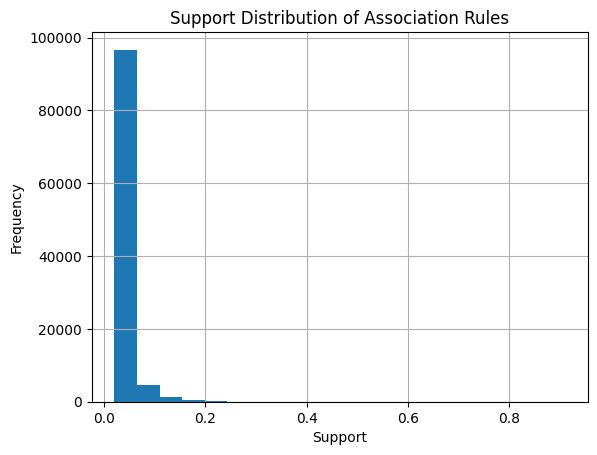

In [63]:
import matplotlib.pyplot as plt

rules['support'].hist(bins=20)
plt.title("Support Distribution of Association Rules")
plt.xlabel("Support")
plt.ylabel("Frequency")
plt.show()


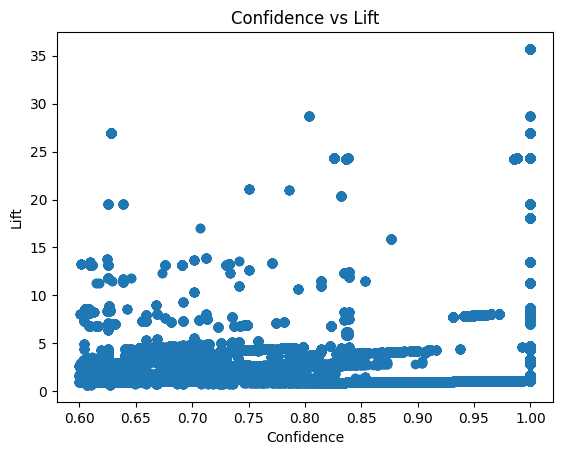

In [64]:
plt.scatter(rules['confidence'], rules['lift'])
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Confidence vs Lift")
plt.show()


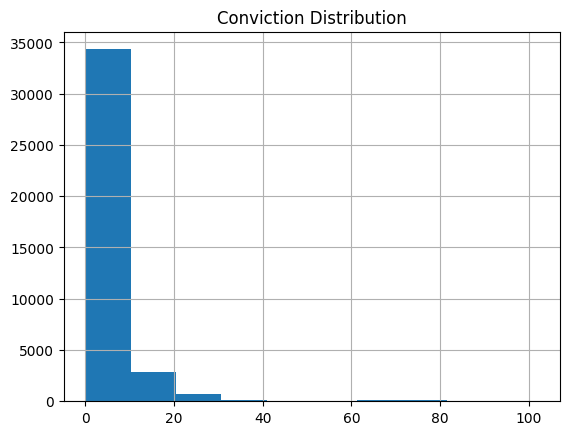

In [65]:
rules['conviction'].replace([float('inf')], None).dropna().hist()
plt.title("Conviction Distribution")
plt.show()


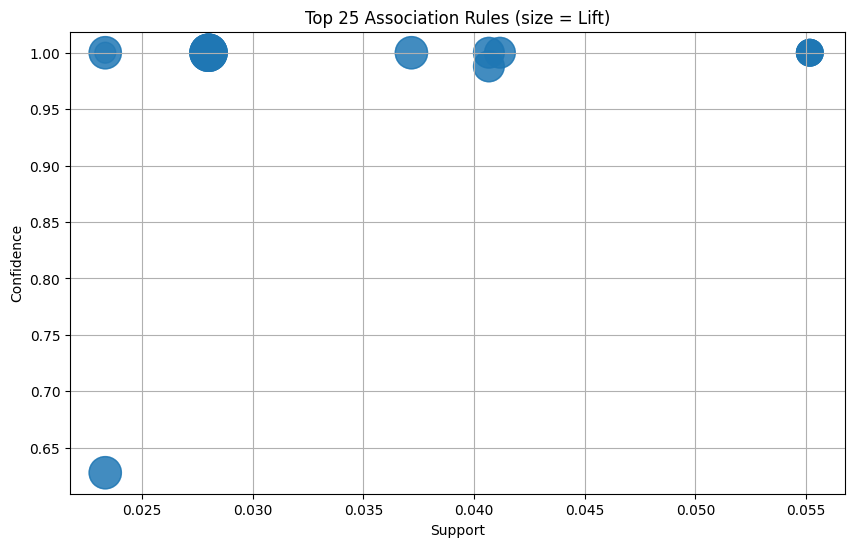

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(
    top25_rules['support'],
    top25_rules['confidence'],
    s=top25_rules['lift']*20,  # marker size proportional to lift
    alpha=0.6
)

plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Top 25 Association Rules (size = Lift)")
plt.grid(True)
plt.show()


- X-axis: Confidence — how reliable the rule is
- Y-axis: Lift — strength of association beyond random chance
- Color: Support — how often the rule occurs in the dataset
- Top-right corner: Rules that are strong, frequent, and highly reliable

In [67]:
from mlxtend.frequent_patterns import apriori, association_rules
start = time.time()

# Frequent itemsets
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Filter: lift > 1.2, confidence > 0.7
hardware_rules = rules[(rules["lift"] > 1.2) & (rules["confidence"] > 0.7)]

# Remove multi-item antecedents/consequents for clarity
hardware_rules_filtered = hardware_rules[
    (hardware_rules["antecedents"].apply(lambda x: len(x) == 1)) &
    (hardware_rules["consequents"].apply(lambda x: len(x) == 1))
]

# Top 25 by lift
top25_rules = hardware_rules_filtered.sort_values("lift", ascending=False).head(25)

# Show table
print(top25_rules[["antecedents", "consequents", "support", "confidence", "lift", "conviction", "leverage"]])


              antecedents           consequents   support  confidence  \
132     (MB_Chipset:A88X)      (MB_Socket:FM2+)  0.055167    1.000000   
84       (MB_Socket:FM2+)     (CPU_Socket:FM2+)  0.055167    1.000000   
85      (CPU_Socket:FM2+)      (MB_Socket:FM2+)  0.055167    1.000000   
80      (MB_Chipset:A88X)     (CPU_Socket:FM2+)  0.055167    1.000000   
81      (CPU_Socket:FM2+)     (MB_Chipset:A88X)  0.055167    1.000000   
131      (MB_Socket:FM2+)     (MB_Chipset:A88X)  0.055167    1.000000   
169       (RAM_Type:DDR5)      (MB_Memory:DDR5)  0.088333    1.000000   
170      (MB_Memory:DDR5)       (RAM_Type:DDR5)  0.088333    1.000000   
65       (MB_Socket:1200)     (CPU_Socket:1200)  0.120167    1.000000   
64      (CPU_Socket:1200)      (MB_Socket:1200)  0.120167    1.000000   
67       (MB_Socket:1700)     (CPU_Socket:1700)  0.125333    1.000000   
68      (CPU_Socket:1700)      (MB_Socket:1700)  0.125333    1.000000   
135      (MB_Chipset:X99)   (MB_Socket:2011-V3)  0.

In [68]:
rules_time = time.time() - start
print(f"Rule Generation Time: {rules_time:.2f} seconds")

Rule Generation Time: 1.41 seconds
